In [13]:
import praw
from datetime import datetime
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')



## COLLECTING THE DATA

In [2]:
# Initialize Reddit API client using PRAW
reddit = praw.Reddit(client_id='K7By9bAhMWAtD658AfOe4A',
                     client_secret='5QHABnqKzI5eaI9RozEZgXE7VqmEOw',
                     user_agent='MyBot/0.0.1',
                     username='Frequent-Morning-897',
                     password='smmspring23')
 


# List of post IDs
post_ids = ['11yn963','11qjoq9','11mj9mj','11pjxfm','10fpayp','11z2r2t','11uczgn',
            '11v7vqc','11sfgcf',
            '11lb6rc','11kruxc','uijxj2','11rh195','zx8qlx','11j50rh',
            '11dgc6o','10vry7m','119gzxl','119tqg4','10rw4on']

# Number of comments to retrieve for each post
num_comments = 50 

data = []

# Loop through each post ID and retrieve comments
for post_id in post_ids:
    post = reddit.submission(id=post_id)
    comments = post.comments[:num_comments]
    
    # Loop through each comment and append to data list
    for comment in comments:
        author = comment.author.name if comment.author else '[deleted]'
        text = comment.body
        timestamp = comment.created_utc
        date = datetime.utcfromtimestamp(timestamp)
        data.append([post_id, post.title,author, date, text])
        
# Create dataframe from data list
df = pd.DataFrame(data, columns=['post_id','title','author','date', 'text' ])

In [3]:
df

,post_id,title,author,date,text
0,11yn963,Abortion rights questions/thoughts,MinisterOfTruth99,2023-03-22 17:48:35,Fascist Republican voters only care about exer...
1,11yn963,Abortion rights questions/thoughts,Andyrich88,2023-03-22 19:26:01,Just had a baby and was very fortunate and had...
2,11yn963,Abortion rights questions/thoughts,kcotter0,2023-03-22 20:32:20,I will not excuse your venting because you are...
3,11yn963,Abortion rights questions/thoughts,Praise_Steezus,2023-03-22 21:05:03,Weird that the same people who advocate agains...
4,11yn963,Abortion rights questions/thoughts,esotericenema,2023-03-22 21:33:11,The only thing that I wonder about sometimes i...
...,...,...,...,...,...
498,10rw4on,Pro-Life: What exactly are you defending?,JohnBarleyCorn2,2023-02-02 19:18:37,this is clearly disingenuous and in bad faith....
499,10rw4on,Pro-Life: What exactly are you defending?,bluemonie,2023-02-03 14:49:45,Everything you wrote for the woman the unborn ...
500,10rw4on,Pro-Life: What exactly are you defending?,Wheel_of_Logic,2023-02-02 18:06:22,"**""Apparently, pro-lifers believe that this en..."
501,10rw4on,Pro-Life: What exactly are you defending?,maxanderson350,2023-02-02 20:10:50,"""Apparently, pro-lifers believe that this enti..."


## PREPROCESSING THE DATA

In [4]:
stop_words = set(stopwords.words('english'))

def preprocess(text):
    
    if not text:
        return ""
    
    text = text.lower()
    words = nltk.word_tokenize(text)
    # remove stop words from the text
    filtered_words = [word for word in words if word not in stop_words]
    # join the filtered words back into a text
    filtered_text = " ".join(filtered_words)
    clean_text = re.sub('[^A-Za-z0-9 ]+', '', filtered_text)
    
    return clean_text

In [5]:
df["comments"] = df["text"].apply(preprocess)

df = df[~df['author'].str.contains('removed|deleted')]

In [6]:
df

,post_id,title,author,date,text,comments
0,11yn963,Abortion rights questions/thoughts,MinisterOfTruth99,2023-03-22 17:48:35,Fascist Republican voters only care about exer...,fascist republican voters care exerting power ...
1,11yn963,Abortion rights questions/thoughts,Andyrich88,2023-03-22 19:26:01,Just had a baby and was very fortunate and had...,baby fortunate almost everything supplied firs...
2,11yn963,Abortion rights questions/thoughts,kcotter0,2023-03-22 20:32:20,I will not excuse your venting because you are...,excuse venting correct republicans believe s...
3,11yn963,Abortion rights questions/thoughts,Praise_Steezus,2023-03-22 21:05:03,Weird that the same people who advocate agains...,weird people advocate abortion murder nt find...
4,11yn963,Abortion rights questions/thoughts,esotericenema,2023-03-22 21:33:11,The only thing that I wonder about sometimes i...,thing wonder sometimes republicans always naz...
...,...,...,...,...,...,...
497,10rw4on,Pro-Life: What exactly are you defending?,Bigabi123,2023-02-03 10:22:26,I defend not killing an innocent human being w...,defend killing innocent human without valid ju...
498,10rw4on,Pro-Life: What exactly are you defending?,JohnBarleyCorn2,2023-02-02 19:18:37,this is clearly disingenuous and in bad faith....,clearly disingenuous bad faith also pretty co...
499,10rw4on,Pro-Life: What exactly are you defending?,bluemonie,2023-02-03 14:49:45,Everything you wrote for the woman the unborn ...,everything wrote woman unborn 810months try l...
500,10rw4on,Pro-Life: What exactly are you defending?,Wheel_of_Logic,2023-02-02 18:06:22,"**""Apparently, pro-lifers believe that this en...",apparently prolifers believe entity known ...


## SENTIMENT ANALYSIS

In [7]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


# initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# function to apply VADER analysis to a text and return a dictionary of sentiment scores
def vader_sentiment(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment

# apply VADER analysis to the Text column and create columns for positive, negative, and neutral polarity scores
df[['Positive', 'Negative', 'Neutral']] = df['comments'].apply(vader_sentiment).apply(lambda x: pd.Series([x['pos'], x['neg'], x['neu']]))

# create a new column for the compound score
df['Sentiment'] = df['comments'].apply(vader_sentiment).apply(lambda x: x['compound'])

# the DataFrame with the sentiment scores
df


,post_id,title,author,date,text,comments,Positive,Negative,Neutral,Sentiment
0,11yn963,Abortion rights questions/thoughts,MinisterOfTruth99,2023-03-22 17:48:35,Fascist Republican voters only care about exer...,fascist republican voters care exerting power ...,0.271,0.305,0.424,-0.2023
1,11yn963,Abortion rights questions/thoughts,Andyrich88,2023-03-22 19:26:01,Just had a baby and was very fortunate and had...,baby fortunate almost everything supplied firs...,0.124,0.254,0.621,-0.5267
2,11yn963,Abortion rights questions/thoughts,kcotter0,2023-03-22 20:32:20,I will not excuse your venting because you are...,excuse venting correct republicans believe s...,0.140,0.000,0.860,0.0772
3,11yn963,Abortion rights questions/thoughts,Praise_Steezus,2023-03-22 21:05:03,Weird that the same people who advocate agains...,weird people advocate abortion murder nt find...,0.000,0.495,0.505,-0.8957
4,11yn963,Abortion rights questions/thoughts,esotericenema,2023-03-22 21:33:11,The only thing that I wonder about sometimes i...,thing wonder sometimes republicans always naz...,0.127,0.038,0.836,0.5106
...,...,...,...,...,...,...,...,...,...,...
497,10rw4on,Pro-Life: What exactly are you defending?,Bigabi123,2023-02-03 10:22:26,I defend not killing an innocent human being w...,defend killing innocent human without valid ju...,0.062,0.423,0.515,-0.9840
498,10rw4on,Pro-Life: What exactly are you defending?,JohnBarleyCorn2,2023-02-02 19:18:37,this is clearly disingenuous and in bad faith....,clearly disingenuous bad faith also pretty co...,0.532,0.201,0.268,0.8360
499,10rw4on,Pro-Life: What exactly are you defending?,bluemonie,2023-02-03 14:49:45,Everything you wrote for the woman the unborn ...,everything wrote woman unborn 810months try l...,0.185,0.000,0.815,0.6124
500,10rw4on,Pro-Life: What exactly are you defending?,Wheel_of_Logic,2023-02-02 18:06:22,"**""Apparently, pro-lifers believe that this en...",apparently prolifers believe entity known ...,0.283,0.285,0.432,-0.2732


In [8]:
# count the number of comments with negative, positive, and neutral polarity
negative = (df['Sentiment'] < 0).sum()
positive = (df['Sentiment'] > 0).sum()
neutral = (df['Sentiment'] == 0).sum()

# print the results
print(f"Negative comments: {negative}")
print(f"Positive comments: {positive}")
print(f"Neutral comments: {neutral}")
print(f"Total comments: {len(df)}")

Negative comments: 236
Positive comments: 204
Neutral comments: 36
Total comments: 476


In [9]:
# get statistics for the Sentiment column
sentiment_stats = df['Sentiment'].describe()

# print the statistics
print(sentiment_stats)

count    476.000000
mean      -0.055325
std        0.615235
min       -0.999200
25%       -0.624900
50%        0.000000
75%        0.476700
max        0.988100
Name: Sentiment, dtype: float64


In [10]:
def label_sentiments(score):
    
    if score > 0:
        return "Positive"
    elif score < 0:
        return "Negative"
    else:
        return "Neutral"

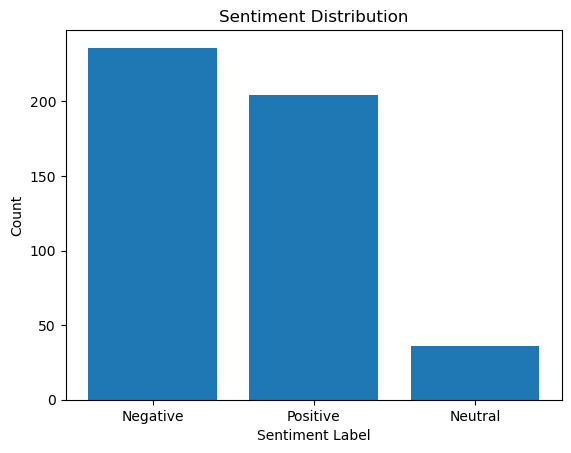

In [11]:
# Count the number of instances of each sentiment label
sentiment_counts = df['Sentiment'].apply(label_sentiments).value_counts()

# Create bar graph
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment Label")
plt.ylabel("Count")
plt.show()

In [12]:
df.to_csv('/Users/apple/Desktop/SMM/reddit_data.csv', index=False)